In [ ]:
# Decomposition Analysis, from Paul
#    Oct. 20, 2016
#      TODO: Add pattern corr b/w Sum and Full for wavenumber breakdown.

In [51]:
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
#import the Basemap plotting package
from mpl_toolkits.basemap import Basemap
from pylab import show, subplot, figure, title, plot, xlabel, ylabel
#import meshgrid for use in mapping
from numpy import meshgrid, arange
from numpy.fft import rfft, irfft

%matplotlib inline



def PlotField(Longitude, Latitude,Field, Title, ContourLevels = []):
    m = Basemap(projection='npstere',boundinglat=10,lon_0=270,resolution='l')#projection='moll',lon_0=180,resolution='c')
    #set up plotting grid (standard commands)
    LonGrid, LatGrid = meshgrid(Longitude, Latitude)
    x, y = m(LonGrid, LatGrid)
    #draw standard markings on map: coasts, latitudes, longitudes
    m.drawcoastlines()
    m.drawparallels(arange(-80.,81.,20.))
    m.drawmeridians(arange(-180.,181.,20.))
    m.drawmapboundary()
    #filled color shading
    #if contour levels passed, use them, otherwise use contourf defaults
    if ContourLevels==[]:
        m.contourf(x, y, Field)
    else:
        m.contourf(x, y, Field,ContourLevels)
    #add title and colorbar
    title(Title)
    m.colorbar()

def cplotfield(lon,lat,fld,title,cmin=None,cmax=None):
    
    bm,pc = cplt.kemmap(fld,lat,lon,title=title,cmin=cmin,cmax=cmax,ptype='nh',round=False)
    
    
    
DataRoot = '/Users/kelly/Desktop/DataDisk/'

Case = 2
if Case == 0:
    VariableFileName = 'st'
    VariableName = 'ST'
    #contour ranges
    dcon = 1.0
    cmin=-10; cmax=10
    cmins=-2.5; cmaxs=2.5

elif Case == 1:
    VariableFileName = 'pmsl'
    VariableName = 'PMSL'
    dcon = 0.5
    cmin=-7.5; cmax=7.5
    cmins=-2; cmaxs=2 # small for small m
    
elif Case == 2:
    VariableFileName = 'u85000'
    VariableName = 'U'
    #contour ranges
    dcon = 1.0
    cmin=-3; cmax=3
    cmins=-.5; cmaxs=.5

cons = arange(-15*dcon,16*dcon, dcon)   
ExpTag = ['preipreiice','2xco2preiice',  'prei2xco2iceb', '2xco22xco2ice']
YearTag = ['2922-3121', '2552-2751', '3022-3221', '2452-2651']
DataFileList = []
FieldList = []

In [18]:
print Longitude.shape

(128,)


In [52]:
#extract data from various files for given file name
for j in range(4):
    FileName = ExpTag[j]+'_'+VariableFileName+'_'+YearTag[j]+'_DJF_mean.nc'
    DataFileList.append(Dataset(DataRoot+FileName))
    FieldList.append(DataFileList[j].variables[VariableName][:,:].squeeze())

#perturbations
#co2
co2_pert = FieldList[1][:]-FieldList[0][:]
#ice
ice_pert = FieldList[2][:]-FieldList[0][:]
#total
ice_co2_pert = FieldList[3][:]-FieldList[0][:]
#longitude
Longitude = DataFileList[0].variables['lon'][:]
#latitude
Latitude =  DataFileList[0].variables['lat'][:]
#diff
diff = ice_pert+co2_pert-ice_co2_pert
#fourier decompose longitudes 0:127 (last entry is same as first)
diff_f = rfft(diff[:,:-1], axis=-1)
#set m>5=0 for all latitudes low pass filter
diff_f[:,4:] = 0
#lowpass filter
lpf = irfft(diff_f,axis = -1)


#### now decompose ice and co2 separately
ice_f = rfft(ice_pert[:,:-1], axis=-1)
co2_f = rfft(co2_pert[:,:-1], axis=-1)
full_f = rfft(ice_co2_pert[:,:-1], axis=-1)

ice_f[:,4:] = 0
co2_f[:,4:] = 0
full_f[:,4:] = 0

ice_lpf = irfft(ice_f,axis=-1)
co2_lpf = irfft(co2_f,axis=-1)
full_lpf = irfft(full_f,axis=-1)





In [20]:
print ice_pert.squeeze().shape
print Longitude.shape
print Latitude.shape

(64, 129)
(129,)
(64,)


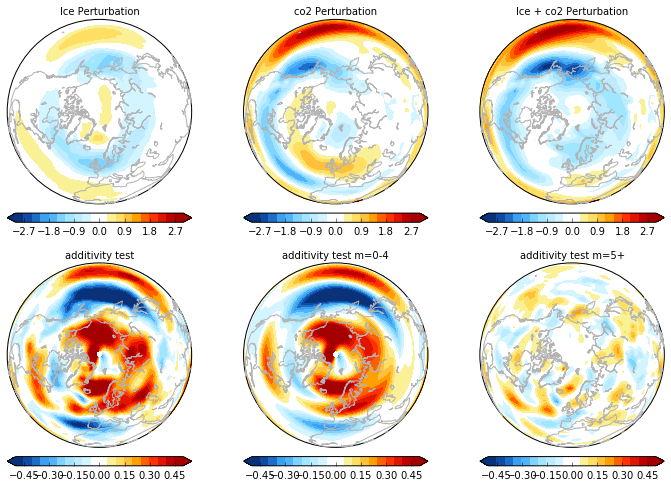

In [53]:

figure(5,figsize=[12,8])
subplot(2,3,1)
cplotfield(Longitude, Latitude, ice_pert.squeeze(),'Ice Perturbation',cmin=cmin,cmax=cmax)
subplot(2,3,2)
cplotfield(Longitude, Latitude, co2_pert.squeeze(),'co2 Perturbation',cmin=cmin,cmax=cmax)
subplot(2,3,3)
cplotfield(Longitude, Latitude, ice_co2_pert.squeeze(),'Ice + co2 Perturbation',cmin=cmin,cmax=cmax)

subplot(2,3,4)
cplotfield(Longitude, Latitude, diff, 'additivity test',cmin=cmins,cmax=cmaxs)
subplot(2,3,5)
cplotfield(Longitude[:-1], Latitude, lpf, 'additivity test m=0-4',cmin=cmins,cmax=cmaxs)
subplot(2,3,6)
cplotfield(Longitude[:-1], Latitude, diff[:,:-1]-lpf, 'additivity test m=5+',cmin=cmins,cmax=cmaxs)



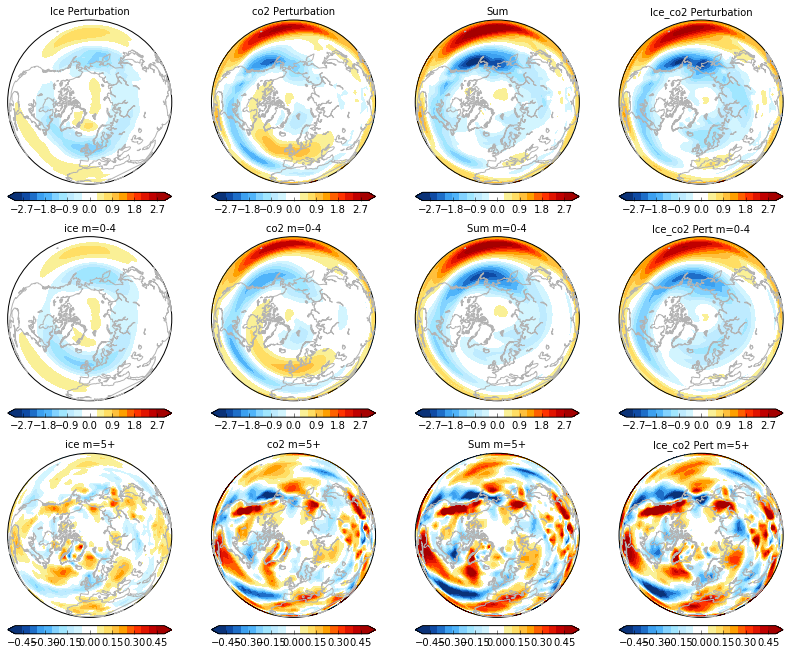

In [54]:
printtofile=True


fig = figure(5,figsize=[14,11])
subplot(3,4,1)
cplotfield(Longitude, Latitude, ice_pert.squeeze(),'Ice Perturbation',cmin=cmin,cmax=cmax)
subplot(3,4,2)
cplotfield(Longitude, Latitude, co2_pert.squeeze(),'co2 Perturbation',cmin=cmin,cmax=cmax)
subplot(3,4,3)
cplotfield(Longitude, Latitude, ice_pert.squeeze()+co2_pert.squeeze(),'Sum',cmin=cmin,cmax=cmax)
subplot(3,4,4)
cplotfield(Longitude, Latitude, ice_co2_pert.squeeze(),'Ice_co2 Perturbation',cmin=cmin,cmax=cmax)

subplot(3,4,5)
cplotfield(Longitude[:-1], Latitude, ice_lpf, 'ice m=0-4',cmin=cmin,cmax=cmax)
subplot(3,4,6)
cplotfield(Longitude[:-1], Latitude, co2_lpf, 'co2 m=0-4',cmin=cmin,cmax=cmax)
subplot(3,4,7)
cplotfield(Longitude[:-1], Latitude, ice_lpf+co2_lpf, 'Sum m=0-4',cmin=cmin,cmax=cmax)
subplot(3,4,8)
cplotfield(Longitude[:-1], Latitude, full_lpf, 'Ice_co2 Pert m=0-4',cmin=cmin,cmax=cmax)

subplot(3,4,9)
cplotfield(Longitude[:-1], Latitude, ice_pert.squeeze()[:,:-1]-ice_lpf, 'ice m=5+',cmin=cmins,cmax=cmaxs)
subplot(3,4,10)
cplotfield(Longitude[:-1], Latitude, co2_pert.squeeze()[:,:-1]-co2_lpf, 'co2 m=5+',cmin=cmins,cmax=cmaxs)
subplot(3,4,11)
cplotfield(Longitude[:-1], Latitude, 
           (ice_pert.squeeze()[:,:-1]-ice_lpf)+(co2_pert.squeeze()[:,:-1]-co2_lpf), 
           'Sum m=5+',cmin=cmins,cmax=cmaxs)
subplot(3,4,12)
cplotfield(Longitude[:-1], Latitude, ice_co2_pert.squeeze()[:,:-1]-full_lpf, 
           'Ice_co2 Pert m=5+',cmin=cmins,cmax=cmaxs)

if printtofile:
    fig.savefig(VariableName+'_ice_co2_sum_full_decomp_DJF.pdf')


/Users/kelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


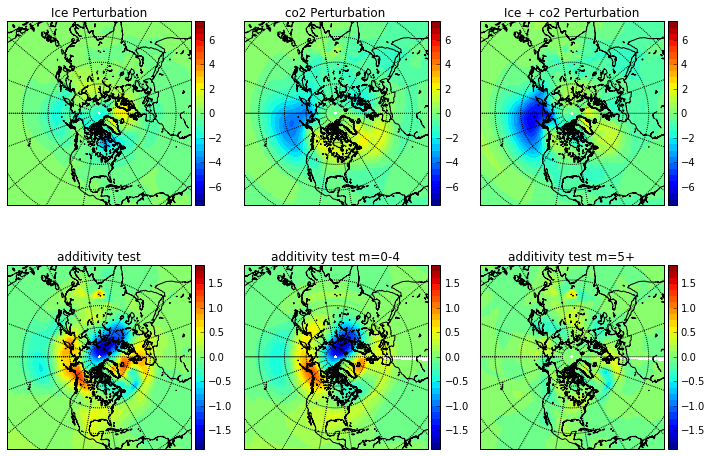

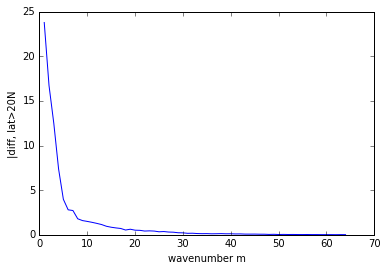

In [13]:
figure(1,figsize=[12,8])
subplot(2,3,1)
PlotField(Longitude, Latitude, ice_pert.squeeze(),'Ice Perturbation',cons)
subplot(2,3,2)
PlotField(Longitude, Latitude, co2_pert.squeeze(),'co2 Perturbation',cons)
subplot(2,3,3)
PlotField(Longitude, Latitude, ice_co2_pert.squeeze(),'Ice + co2 Perturbation',cons)
#figure(2)

subplot(2,3,4)
PlotField(Longitude, Latitude, diff, 'additivity test',cons/4)
Longitude = Longitude[:-1]
subplot(2,3,5)
PlotField(Longitude, Latitude, lpf, 'additivity test m=0-4',cons/4)
subplot(2,3,6)
PlotField(Longitude, Latitude, diff[:,:-1]-lpf, 'additivity test m=5+',cons/4)

#plot mean difference as function of wavenumber
figure(3)
diff_f = rfft(diff[:,:-1], axis=-1)
adiff = abs(diff_f[39:,1:])
meanadiff=adiff.mean(axis=0)
plot(arange(len(meanadiff))+1,meanadiff)
ylabel('|diff, lat>20N')
xlabel('wavenumber m')
#show()